<a href="https://colab.research.google.com/github/rithiksss/oral_cancer_detection/blob/main/oralcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Function to generate a dataset
def generate_dataset(category, num_images=500):
    data = []

    for i in range(1, num_images + 1):
        img_id = f"{i:03d}.jpeg"
        patho_img_id = f"patho_{i:03d}.jpeg"  # Assuming similar naming for pathological images
        cancer_status = "Cancer" if category == "cancer" else "Non-Cancer"

        # Leave metadata empty for manual entry
        data.append([img_id, patho_img_id, cancer_status, "", "", ""])

    return pd.DataFrame(data, columns=["Image_ID", "Pathological_Image_ID", "Cancer_Status", "Smoking", "Age", "Precancerous_Lesions"])

# Generate cancer and non-cancer datasets
cancer_df = generate_dataset("cancer")
non_cancer_df = generate_dataset("non_cancer")

# Save as CSV files
cancer_df.to_csv("cancer_data.csv", index=False)
non_cancer_df.to_csv("non_cancer_data.csv", index=False)

print("✅ Cancer and Non-Cancer CSV files created. ")


✅ Cancer and Non-Cancer CSV files created. You can now update metadata manually.


In [ ]:
import pandas as pd
import numpy as np
import random

def generate_metadata(category, num_images=500):
    data = []

    for i in range(1, num_images + 1):
        img_id = f"{i:03d}.jpeg"
        patho_img_id = f"patho_{i:03d}.jpeg"
        cancer_status = "Cancer" if category == "cancer" else "Non-Cancer"

        smoking_prob = 0.85 if category == "cancer" else 0.20
        precancerous_prob = 0.70 if category == "cancer" else 0.10


        smoking = "Yes" if random.random() < smoking_prob else "No"
        age = np.random.normal(loc=55 if category == "cancer" else 35, scale=10)
        age = int(max(20, min(80, age)))  # Keep age within range
        precancerous = "Yes" if random.random() < precancerous_prob else "No"

        data.append([img_id, patho_img_id, cancer_status, smoking, age, precancerous])

    return pd.DataFrame(data, columns=["Image_ID", "Pathological_Image_ID", "Cancer_Status", "Smoking", "Age", "Precancerous_Lesions"])

cancer_df = generate_metadata("cancer")
non_cancer_df = generate_metadata("non_cancer")

cancer_df.to_csv("cancer_data.csv", index=False)
non_cancer_df.to_csv("non_cancer_data.csv", index=False)

print("Cancer and Non-Cancer CSV files created" )


Cancer and Non-Cancer CSV files created


In [ ]:
import pandas as pd

# Load the existing CSV files
cancer_df = pd.read_csv('cancer_data.csv')
non_cancer_df = pd.read_csv('non_cancer_data.csv')

# Drop the 'Pathological_Image_ID' column if it exists
cancer_df = cancer_df.drop(columns=['Pathological_Image_ID'], errors='ignore')
non_cancer_df = non_cancer_df.drop(columns=['Pathological_Image_ID'], errors='ignore')

# Save the updated CSV files without the dropped column
cancer_df.to_csv('cancer_data.csv', index=False)
non_cancer_df.to_csv('non_cancer_data.csv', index=False)

print("Pathological_Image_ID' column has been dropped from both CSV files!")


Pathological_Image_ID' column has been dropped from both CSV files!


In [ ]:
pip install opencv-python


In [ ]:
import os
import cv2

# Define input and output directories
base_dir = "/content/drive/MyDrive/oralcancerdatasets"  # Change to your actual dataset directory
folders = ["CANCER", "NON CANCER"]  # List of subfolders containing images
output_size = (224, 224)  # Change to (512,512) if needed

def resize_images(input_folder):
    """Resizes all images in a folder to the specified output size."""
    image_folder = os.path.join(base_dir, input_folder)

    for img_name in os.listdir(image_folder):
        img_path = os.path.join(image_folder, img_name)

        # Check if it's an image file
        if img_name.lower().endswith((".jpg", ".jpeg", ".png")):
            img = cv2.imread(img_path)

            if img is not None:
                resized_img = cv2.resize(img, output_size)
                cv2.imwrite(img_path, resized_img)  # Overwrite with resized image
                print(f" Resized: {img_name} -> {output_size}")
            else:
                print(f"⚠️ Could not read: {img_name}")

# Process both folders
for folder in folders:
    resize_images(folder)

print("All images resized successfully!")


✅ Resized: 012.jpeg -> (224, 224)
✅ Resized: 041.jpeg -> (224, 224)
✅ Resized: 010.jpeg -> (224, 224)
✅ Resized: 007.jpeg -> (224, 224)
✅ Resized: 003.jpeg -> (224, 224)
✅ Resized: 001.jpeg -> (224, 224)
✅ Resized: 040.jpeg -> (224, 224)
✅ Resized: 009.jpeg -> (224, 224)
✅ Resized: 008.jpeg -> (224, 224)
✅ Resized: 005.jpeg -> (224, 224)
✅ Resized: 006.jpeg -> (224, 224)
✅ Resized: 004.jpeg -> (224, 224)
✅ Resized: 002.jpeg -> (224, 224)
✅ Resized: 045.jpeg -> (224, 224)
✅ Resized: 042.jpeg -> (224, 224)
✅ Resized: 043.jpeg -> (224, 224)
✅ Resized: 039.jpeg -> (224, 224)
✅ Resized: 038.jpeg -> (224, 224)
✅ Resized: 048.jpeg -> (224, 224)
✅ Resized: 044.jpeg -> (224, 224)
✅ Resized: 037.jpeg -> (224, 224)
✅ Resized: 035.jpeg -> (224, 224)
✅ Resized: 346.jpeg -> (224, 224)
✅ Resized: 047.jpeg -> (224, 224)
✅ Resized: 028.jpeg -> (224, 224)
✅ Resized: 029.jpeg -> (224, 224)
✅ Resized: 027.jpeg -> (224, 224)
✅ Resized: 026.jpeg -> (224, 224)
✅ Resized: 031.jpeg -> (224, 224)
✅ Resized: 033

NORAMALIZE AND STORE IN THE SAME PLACE


In [ ]:
import os
import cv2
import numpy as np

# Define dataset directories
base_dir = "/content/drive/MyDrive/oralcancerdatasets"  # Adjust to your dataset path
folders = ["CANCER", "NON CANCER"]  # List of subfolders

def normalize_images(input_folder):
    """Normalizes pixel values to [0,1] and overwrites images."""
    image_folder = os.path.join(base_dir, input_folder)

    for img_name in os.listdir(image_folder):
        img_path = os.path.join(image_folder, img_name)

        # Check if it's an image file
        if img_name.lower().endswith((".jpg", ".jpeg", ".png")):
            img = cv2.imread(img_path)

            if img is not None:
                # Normalize pixel values to [0,1]
                img = img.astype(np.float32) / 255.0

                # Convert back to [0,255] and save (OpenCV needs uint8)
                img = (img * 255).astype(np.uint8)
                cv2.imwrite(img_path, img)

                print(f"Normalized: {img_name}")
            else:
                print(f"⚠️ Could not read: {img_name}")

# Apply normalization to both cancer and non-cancer folders
for folder in folders:
    normalize_images(folder)

print("✅ All images normalized successfully!")


✅ Normalized: 012.jpeg
✅ Normalized: 041.jpeg
✅ Normalized: 010.jpeg
✅ Normalized: 007.jpeg
✅ Normalized: 003.jpeg
✅ Normalized: 001.jpeg
✅ Normalized: 040.jpeg
✅ Normalized: 009.jpeg
✅ Normalized: 008.jpeg
✅ Normalized: 005.jpeg
✅ Normalized: 006.jpeg
✅ Normalized: 004.jpeg
✅ Normalized: 002.jpeg
✅ Normalized: 045.jpeg
✅ Normalized: 042.jpeg
✅ Normalized: 043.jpeg
✅ Normalized: 039.jpeg
✅ Normalized: 038.jpeg
✅ Normalized: 048.jpeg
✅ Normalized: 044.jpeg
✅ Normalized: 037.jpeg
✅ Normalized: 035.jpeg
✅ Normalized: 346.jpeg
✅ Normalized: 047.jpeg
✅ Normalized: 028.jpeg
✅ Normalized: 029.jpeg
✅ Normalized: 027.jpeg
✅ Normalized: 026.jpeg
✅ Normalized: 031.jpeg
✅ Normalized: 033.jpeg
✅ Normalized: 079.jpeg
✅ Normalized: 036.jpeg
✅ Normalized: 034.jpeg
✅ Normalized: 022.jpeg
✅ Normalized: 030.jpeg
✅ Normalized: 025.jpeg
✅ Normalized: 023.jpeg
✅ Normalized: 062.jpeg
✅ Normalized: 061.jpeg
✅ Normalized: 032.jpeg
✅ Normalized: 024.jpeg
✅ Normalized: 011.jpeg
✅ Normalized: 013.jpeg
✅ Normalize

check for normalized values

In [ ]:
import cv2
import numpy as np

# Load an image
image_path = "/content/drive/MyDrive/oralcancerdatasets/CANCER/001.jpeg"
img = cv2.imread(image_path)

# Convert to float and normalize
img_normalized = img.astype(np.float32) / 255.0

# Check min and max pixel values
print(f"Min Pixel Value: {np.min(img_normalized)}")  # Should be 0.0
print(f"Max Pixel Value: {np.max(img_normalized)}")  # Should be 1.0

# Display image
cv2_imshow("Normalized Image", img_normalized)  # It may appear normal
cv2.waitKey(0)
cv2.destroyAllWindows()


Min Pixel Value: 0.003921568859368563
Max Pixel Value: 1.0


NameError: name 'cv2_imshow' is not defined

Augumentation

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os

# Define augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode="nearest"
)

# Directory paths
input_dir = "/content/drive/MyDrive/oralcancerdatasets/NON CANCER"
output_dir = "/content/drive/MyDrive/oralcancerdatasets/NON CANCER_AUGUMENTED "

os.makedirs(output_dir, exist_ok=True)

# Augment images
for filename in os.listdir(input_dir):
    img_path = os.path.join(input_dir, filename)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = img.reshape((1,) + img.shape)  # Reshape for ImageDataGenerator

    # Generate 5 augmented images per original
    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir=output_dir, save_prefix="aug", save_format="jpeg"):
        i += 1
        if i >= 5:  # Generate 5 augmented images per original
            break

print("Data augmentation completed! Augmented images are stored in:", output_dir)


✅ Data augmentation completed! Augmented images are stored in: /content/drive/MyDrive/oralcancerdatasets/NON CANCER_AUGUMENTED 


In [ ]:
import cv2
import os
import numpy as np

# Define input and output directories
input_dir = "/content/drive/MyDrive/oralcancerdatasets/NON CANCER_AUGUMENTED "
output_dir = "/content/drive/MyDrive/oralcancerdatasets/NON CANCER_AUGMENTED_PROCESSED/"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process all .jpeg files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".jpeg"):
        # Load image
        img_path = os.path.join(input_dir, filename)
        img = cv2.imread(img_path)

        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Threshold the image
        _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw bounding boxes around lesions
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Save the processed image in the output directory
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, img)
print("saved")



saved


In [ ]:
import os

# Define class IDs: 0 for cancer, 1 for non-cancer
class_ids = {'cancer': 0, 'non_cancer': 1}

# Paths to your directories
image_dir_cancer = "/content/drive/MyDrive/oralcancerdatasets/C_A_PROCESSED"
image_dir_non_cancer = "/content/drive/MyDrive/oralcancerdatasets/NC_A_PROCESSED"

# Function to write YOLO annotation file for each image
def write_yolo_annotations(image_path, annotations, label_dir):
    # Create a label file with the same name as the image but with .txt extension
    base_filename = os.path.splitext(os.path.basename(image_path))[0]
    label_file = os.path.join(label_dir, base_filename + ".txt")

    with open(label_file, 'w') as f:
        for ann in annotations:
            # Format: <class_id> <x_center> <y_center> <width> <height>
            f.write(f"{ann['class_id']} {ann['x_center']} {ann['y_center']} {ann['width']} {ann['height']}\n")

# Example usage: Add your bounding boxes to each image
annotations_cancer = [
    # This is an example of a cancer lesion, class 0 (cancer)
    {'class_id': 0, 'x_center': 0.5, 'y_center': 0.5, 'width': 0.1, 'height': 0.1}
]

annotations_non_cancer = [
    # No bounding box needed for non-cancer images
]

# Loop through images in the cancer directory and create annotation files
for image_filename in os.listdir(image_dir_cancer):
    image_path = os.path.join(image_dir_cancer, image_filename)
    write_yolo_annotations(image_path, annotations_cancer, image_dir_cancer)

# Loop through images in the non-cancer directory and create annotation files
for image_filename in os.listdir(image_dir_non_cancer):
    image_path = os.path.join(image_dir_non_cancer, image_filename)
    write_yolo_annotations(image_path, annotations_non_cancer, image_dir_non_cancer)

print(" Annotation files created for all images.")


✅ Annotation files created for all images.


In [ ]:
import shutil
import os

# Define label source directories
cancer_label_dir = "/content/drive/MyDrive/oralcancerdatasets/C_A_PROCESSED"
non_cancer_label_dir = "/content/drive/MyDrive/oralcancerdatasets/NC_A_PROCESSED"

# Define destination directory
label_dest_dir = "/content/drivoralcancerdatasets/all_labels"
os.makedirs(label_dest_dir, exist_ok=True)

# Move cancer labels
for file in os.listdir(cancer_label_dir):
    if file.endswith(".txt"):
        shutil.move(os.path.join(cancer_label_dir, file), os.path.join(label_dest_dir, file))

# Move non-cancer labels
for file in os.listdir(non_cancer_label_dir):
    if file.endswith(".txt"):
        shutil.move(os.path.join(non_cancer_label_dir, file), os.path.join(label_dest_dir, file))

print("✅ All label files moved to 'all_labels' directory!")


✅ All label files moved to 'all_labels' directory!


In [ ]:
import os
import shutil

# Define source and destination directories
src_dir = "/content/drive/MyDrive/oralcancerdatasets"
dst_dir = "/content/drive/MyDrive/oralcancerdatasets/all_labels"

# Ensure destination directory exists
os.makedirs(dst_dir, exist_ok=True)

# Move all .txt files from src_dir to dst_dir
for filename in os.listdir(src_dir):
    if filename.endswith(".txt"):  # Ensure only label files are moved
        shutil.move(os.path.join(src_dir, filename), os.path.join(dst_dir, filename))

print("✅ All label files have been moved successfully!")


✅ All label files have been moved successfully!


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -U -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.11 MiB | 27.31 MiB/s, done.
Resolving deltas: 100% (11861/11861), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import torch
print("Torch Version:", torch.__version__)
import ultralytics
print("Ultralytics Version:", ultralytics.__version__)


Torch Version: 2.6.0+cu124
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics Version: 8.3.85


In [ ]:
import torch
print("GPU Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


GPU Available: True
GPU Name: Tesla T4


In [ ]:
import os
import shutil
from glob import glob

# Define paths
base_path = "/content/drive/MyDrive/oralcancerdatasets"
output_path = "/content/drive/MyDrive/oralcancerdatasets/yolo_format"

# YOLO folders
yolo_folders = ["train/images", "train/labels", "valid/images", "valid/labels", "test/images", "test/labels"]

# Create necessary directories
for folder in yolo_folders:
    os.makedirs(os.path.join(output_path, folder), exist_ok=True)

# Move cancer and non-cancer images
for category, folder in [("CANCER", "C_A_PROCESSED"), ("NON_CANCER", "NC_A_PROCESSED")]:
    image_paths = glob(os.path.join(base_path, folder, "*.jpeg"))
    label_paths = glob(os.path.join(base_path, "all_labels", "*.txt"))

    for i, img_path in enumerate(image_paths):
        if i < len(image_paths) * 0.7:  # 70% for training
            dest_img = "train/images"
            dest_label = "train/labels"
        elif i < len(image_paths) * 0.85:  # 15% for validation
            dest_img = "valid/images"
            dest_label = "valid/labels"
        else:  # 15% for testing
            dest_img = "test/images"
            dest_label = "test/labels"

        # Move image
        shutil.move(img_path, os.path.join(output_path, dest_img, os.path.basename(img_path)))

        # Move corresponding label
        label_file = os.path.join(base_path, "all_labels", os.path.basename(img_path).replace(".jpeg", ".txt"))
        if os.path.exists(label_file):
            shutil.move(label_file, os.path.join(output_path, dest_label, os.path.basename(label_file)))

print("✅ Dataset moved to YOLO format successfully!")


✅ Dataset moved to YOLO format successfully!


In [ ]:
dataset_yaml = """
train: /content/drive/MyDrive/oralcancerdatasets/yolo_format/train
val: /content/drive/MyDrive/oralcancerdatasets/yolo_format/valid
test: /content/drive/MyDrive/oralcancerdatasets/yolo_format/test

nc: 2  # Number of classes
names: ["Cancer", "Non-Cancer"]
"""

# Define file path
yaml_path = "/content/drive/MyDrive/oralcancerdatasets/yolo_format/dataset.yaml"

# Write YAML content to file
with open(yaml_path, "w") as f:
    f.write(dataset_yaml)

print(f"✅ dataset.yaml created at {yaml_path}")


✅ dataset.yaml created at /content/drive/MyDrive/oralcancerdatasets/yolo_format/dataset.yaml


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov5s.pt")
model.train(data="/content/drive/MyDrive/oralcancerdatasets/yolo_format/dataset.yaml", epochs=10, batch=16, imgsz=640)


PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 127MB/s] 


Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=/content/drive/MyDrive/oralcancerdatasets/yolo_format/dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

100%|██████████| 755k/755k [00:00<00:00, 18.3MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      3520  ultralytics.nn.modules.conv.Conv             [3, 32, 6, 2, 2]              
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     18816  ultralytics.nn.modules.block.C3              [64, 64, 1]                   
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    115712  ultralytics.nn.modules.block.C3              [128, 128, 2]                 
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  3    625152  ultralytics.nn.modules.block.C3              [256, 256, 3]                 
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 31.6MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/oralcancerdatasets/yolo_format/train/labels.cache... 2177 images, 879 backgrounds, 0 corrupt: 100%|██████████| 2227/2227 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/oralcancerdatasets/yolo_format/valid/labels.cache... 474 images, 206 backgrounds, 0 corrupt: 100%|██████████| 499/499 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.97G      2.425      7.575      2.244          2        640: 100%|██████████| 140/140 [06:34<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.39it/s]

                   all        499        293   0.000986      0.372    0.00115   0.000549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.07G      1.665      2.974      1.802          2        640: 100%|██████████| 140/140 [00:49<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.76it/s]

                   all        499        293    0.00331      0.942    0.00394    0.00241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.96G      1.482      2.781      1.649          2        640: 100%|██████████| 140/140 [00:49<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.00it/s]

                   all        499        293     0.0244      0.334      0.018     0.0103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.09G      1.289      2.622      1.513          3        640: 100%|██████████| 140/140 [00:48<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.03it/s]

                   all        499        293    0.00561          1      0.016     0.0106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.09G      1.124      2.464      1.346          3        640: 100%|██████████| 140/140 [00:50<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.83it/s]

                   all        499        293     0.0189      0.986      0.071     0.0477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.08G     0.9857       2.33      1.261          2        640: 100%|██████████| 140/140 [00:48<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.90it/s]

                   all        499        293     0.0482      0.969     0.0885      0.076



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.09G     0.8889      2.193      1.173          2        640: 100%|██████████| 140/140 [00:48<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.89it/s]

                   all        499        293      0.165      0.608      0.185      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.08G     0.8074      2.012      1.106          1        640: 100%|██████████| 140/140 [00:49<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.90it/s]

                   all        499        293      0.138      0.887       0.15      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.09G     0.6889      1.882      1.029          2        640: 100%|██████████| 140/140 [00:50<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.92it/s]

                   all        499        293      0.173       0.73      0.198       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.08G     0.6333      1.833      1.006          1        640: 100%|██████████| 140/140 [00:48<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.79it/s]

                   all        499        293      0.266      0.751      0.324      0.294



10 epochs completed in 0.255 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5s summary (fused): 84 layers, 9,112,310 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.01it/s]


                   all        499        293      0.267      0.754      0.324      0.294
                Cancer        293        293      0.267      0.754      0.324      0.294
Speed: 0.3ms preprocess, 4.2ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d50e9002510>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
import torch

# List your model files
model_files = ["yolo11n.pt", "yolov5su.pt"]

for file in model_files:
    try:
        print(f"\nChecking {file}...")
        model = torch.load(file, map_location="cpu")  # Load model file

        # If it's a YOLO model, it should contain "names" or "model" keys
        if isinstance(model, dict) and "names" in model:
            print(f"✅ {file} contains a trained YOLO model with {len(model['names'])} classes.")
        elif hasattr(model, 'names'):
            print(f"✅ {file} contains a trained YOLO model with {len(model.names)} classes.")
        else:
            print(f"❌ {file} is not a valid YOLO trained model.")

    except Exception as e:
        print(f"⚠️ Could not load {file}: {e}")



Checking yolo11n.pt...
❌ yolo11n.pt is not a valid YOLO trained model.

Checking yolov5su.pt...
❌ yolov5su.pt is not a valid YOLO trained model.


In [ ]:
from ultralytics import YOLO

# Train the YOLO model
model = YOLO("yolov5s.pt")
model.train(data="/content/drive/MyDrive/oralcancerdatasets/yolo_format/dataset.yaml", epochs=50, batch=16, imgsz=640)

# Save the trained model
model_path = "best.pt"  # YOLO saves the best model automatically


PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=/content/drive/MyDrive/oralcancerdatasets/yolo_format/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=Fal

train: Scanning /content/drive/MyDrive/oralcancerdatasets/yolo_format/train/labels.cache... 2177 images, 879 backgrounds, 0 corrupt: 100%|██████████| 2227/2227 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/oralcancerdatasets/yolo_format/valid/labels.cache... 474 images, 206 backgrounds, 0 corrupt: 100%|██████████| 499/499 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.26G      2.668      7.455      2.166          2        640: 100%|██████████| 140/140 [00:59<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.72it/s]


                   all        499        293   0.000509      0.246   0.000319   0.000124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.94G      2.112      4.024      1.767          5        640: 100%|██████████| 140/140 [00:50<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.41it/s]

                   all        499        293   0.000567       0.27   0.000393   0.000184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.96G      1.855      3.831      1.679          4        640: 100%|██████████| 140/140 [00:50<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.15it/s]

                   all        499        293     0.0106      0.143    0.00606    0.00204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.08G      1.741      3.678      1.618          2        640: 100%|██████████| 140/140 [00:50<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.20it/s]

                   all        499        293    0.00248      0.287    0.00175    0.00109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.94G      1.571      3.512      1.512          1        640: 100%|██████████| 140/140 [00:51<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.66it/s]

                   all        499        293     0.0111      0.771     0.0144    0.00996



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.94G      1.414      3.346      1.418          2        640: 100%|██████████| 140/140 [00:49<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.48it/s]

                   all        499        293    0.00489      0.843     0.0154     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.08G      1.286      3.236      1.335          0        640: 100%|██████████| 140/140 [00:49<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.47it/s]

                   all        499        293    0.00692      0.928     0.0247     0.0183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.94G      1.201      3.077      1.274          4        640: 100%|██████████| 140/140 [00:50<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.70it/s]

                   all        499        293     0.0712      0.358       0.06     0.0498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.08G      1.164      2.986      1.242          2        640: 100%|██████████| 140/140 [00:51<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.90it/s]

                   all        499        293      0.113      0.799      0.159      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.94G      1.164      3.022      1.246          2        640: 100%|██████████| 140/140 [00:52<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.41it/s]

                   all        499        293     0.0122      0.201    0.00784    0.00499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.94G      1.073      2.811      1.183          2        640: 100%|██████████| 140/140 [00:49<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.50it/s]

                   all        499        293      0.195       0.28      0.145      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.08G     0.9643      2.653       1.12          2        640: 100%|██████████| 140/140 [00:50<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.88it/s]

                   all        499        293      0.297      0.451      0.345      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.08G     0.9763      2.581      1.117          1        640: 100%|██████████| 140/140 [00:52<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.87it/s]

                   all        499        293      0.382      0.717      0.442      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.93G     0.9302      2.519      1.092          2        640: 100%|██████████| 140/140 [00:50<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.76it/s]

                   all        499        293       0.29      0.724      0.321      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.08G     0.8964      2.506      1.085          3        640: 100%|██████████| 140/140 [00:49<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.50it/s]

                   all        499        293      0.104      0.642     0.0951     0.0774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.08G     0.8551      2.376      1.056          2        640: 100%|██████████| 140/140 [00:49<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.42it/s]

                   all        499        293      0.572      0.952       0.63      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.08G     0.8211      2.243      1.037          3        640: 100%|██████████| 140/140 [00:51<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.97it/s]

                   all        499        293      0.316      0.877      0.332      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.94G     0.8022      2.257      1.034          1        640: 100%|██████████| 140/140 [00:49<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.97it/s]

                   all        499        293      0.601      0.928      0.685      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.08G     0.7618      2.162      1.018          1        640: 100%|██████████| 140/140 [00:49<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.48it/s]

                   all        499        293      0.503      0.857      0.588      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.08G     0.7568      2.114      1.011          3        640: 100%|██████████| 140/140 [00:49<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.50it/s]

                   all        499        293      0.501      0.812      0.554      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.08G      0.696      2.043     0.9865          5        640: 100%|██████████| 140/140 [00:50<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.40it/s]

                   all        499        293      0.641      0.784       0.63      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.08G     0.7077      2.057     0.9803          1        640: 100%|██████████| 140/140 [00:50<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.99it/s]

                   all        499        293       0.57      0.843      0.592      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.93G     0.6704      1.922     0.9588          0        640: 100%|██████████| 140/140 [00:50<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.93it/s]

                   all        499        293       0.59      0.945      0.604      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.94G     0.6655      1.896     0.9683          5        640: 100%|██████████| 140/140 [00:50<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.80it/s]

                   all        499        293      0.578      0.927      0.646      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.94G     0.6595      1.835     0.9515          1        640: 100%|██████████| 140/140 [00:50<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.38it/s]

                   all        499        293      0.597      0.973      0.698      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.08G     0.6148      1.772     0.9354          1        640: 100%|██████████| 140/140 [00:50<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.86it/s]

                   all        499        293      0.627      0.889      0.687      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.94G     0.6139      1.745     0.9409          3        640: 100%|██████████| 140/140 [00:51<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.02it/s]

                   all        499        293      0.472      0.898      0.518      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.93G     0.6031      1.675     0.9282          1        640: 100%|██████████| 140/140 [00:51<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.72it/s]

                   all        499        293      0.593      0.915      0.666        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.94G     0.5898      1.766     0.9284          2        640: 100%|██████████| 140/140 [00:51<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.45it/s]

                   all        499        293      0.643      0.945      0.782      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.08G     0.5762      1.616      0.925          2        640: 100%|██████████| 140/140 [00:49<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.51it/s]

                   all        499        293       0.59      0.937      0.647      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.08G     0.5831      1.694     0.9262          1        640: 100%|██████████| 140/140 [00:50<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.91it/s]

                   all        499        293      0.594      0.898      0.652      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.08G     0.5339       1.51     0.9057          2        640: 100%|██████████| 140/140 [00:50<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.01it/s]

                   all        499        293      0.597      0.949       0.68      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.94G     0.5584      1.576     0.9113          3        640: 100%|██████████| 140/140 [00:52<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.47it/s]

                   all        499        293      0.587      0.974      0.672      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.08G     0.5271      1.464     0.8966          5        640: 100%|██████████| 140/140 [00:50<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.38it/s]

                   all        499        293      0.602      0.932      0.699      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.94G     0.5134      1.485     0.9052          2        640: 100%|██████████| 140/140 [00:52<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.12it/s]

                   all        499        293      0.588       0.98      0.669      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.08G     0.5214      1.367     0.8973          4        640: 100%|██████████| 140/140 [00:50<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.01it/s]

                   all        499        293      0.587      0.997      0.713      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.94G     0.4859      1.405     0.8915          1        640: 100%|██████████| 140/140 [02:00<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.58it/s]

                   all        499        293      0.595      0.971      0.681      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.08G     0.4879       1.33     0.8901          2        640: 100%|██████████| 140/140 [00:50<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.41it/s]

                   all        499        293      0.597      0.983      0.631      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.94G     0.4798      1.365     0.8843          3        640: 100%|██████████| 140/140 [00:53<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.98it/s]

                   all        499        293      0.597      0.993      0.679       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.08G     0.4684       1.31     0.8803          4        640: 100%|██████████| 140/140 [00:51<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.04it/s]

                   all        499        293      0.608      0.915      0.739      0.706


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.94G     0.4454      1.548     0.9033          2        640: 100%|██████████| 140/140 [00:51<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.45it/s]

                   all        499        293      0.611       0.99      0.743      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.94G     0.4038      1.486     0.8808          2        640: 100%|██████████| 140/140 [00:48<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.52it/s]

                   all        499        293      0.619      0.993      0.726      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.08G     0.3942        1.4      0.875          3        640: 100%|██████████| 140/140 [00:50<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.41it/s]

                   all        499        293      0.661      0.957       0.76      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.08G     0.3621       1.32     0.8531          1        640: 100%|██████████| 140/140 [00:48<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.84it/s]

                   all        499        293      0.627      0.983      0.749      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.08G     0.3709      1.345     0.8572          2        640: 100%|██████████| 140/140 [00:49<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.88it/s]

                   all        499        293      0.646      0.983      0.773      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.94G     0.3462      1.287      0.857          3        640: 100%|██████████| 140/140 [00:49<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.91it/s]

                   all        499        293      0.635      0.962       0.79      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.94G     0.3522      1.337     0.8541          1        640: 100%|██████████| 140/140 [00:49<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.51it/s]

                   all        499        293      0.637      0.969      0.764      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.94G       0.33      1.248     0.8415          2        640: 100%|██████████| 140/140 [00:48<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.83it/s]

                   all        499        293      0.663      0.949      0.783      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.93G     0.3276      1.249     0.8387          0        640: 100%|██████████| 140/140 [00:48<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.73it/s]

                   all        499        293      0.651      0.959      0.778      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.94G     0.3283      1.226     0.8422          2        640: 100%|██████████| 140/140 [00:48<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.52it/s]

                   all        499        293      0.639      0.959      0.786      0.767



50 epochs completed in 0.825 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 18.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 18.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5s summary (fused): 84 layers, 9,112,310 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.95it/s]


                   all        499        293       0.64      0.962      0.786      0.767
                Cancer        293        293       0.64      0.962      0.786      0.767
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train2



image 1/1 /content/drive/MyDrive/oralcancerdatasets/CANCER/003.jpeg: 640x640 (no detections), 14.9ms
Speed: 2.4ms preprocess, 14.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


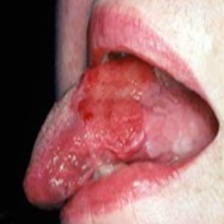

In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image

# Load the trained model
model_path = "runs/detect/train2/weights/best.pt"  # Adjust if necessary
model = YOLO(model_path)

# Input image path
image_path = "/content/drive/MyDrive/oralcancerdatasets/CANCER/003.jpeg"  # Change to your test image

# Run inference
results = model(image_path)

# Show the output
for result in results:
    result.show()  # Display the image with detections
    result.save(filename="output.jpg")  # Save the output image



image 1/1 /content/drive/MyDrive/oralcancerdatasets/CANCER/003.jpeg: 640x640 (no detections), 14.8ms
Speed: 2.9ms preprocess, 14.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


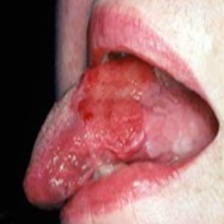

⚠️ No detections found. Try training longer or checking dataset labels.


In [ ]:
import torch
from ultralytics import YOLO
from PIL import Image

# Load the trained model
model_path = "runs/detect/train2/weights/best.pt"  # Ensure this is the correct path
model = YOLO(model_path)

# Function to run inference
def detect_cancer(image_path):
    results = model(image_path, conf=0.01)  # Lower confidence threshold

    # Display detections
    for result in results:
        result.show()  # Display the annotated image

    # Check if any detections were found
    if not results or result.boxes is None or len(result.boxes.xyxy) == 0:
        print("⚠️ No detections found. Try training longer or checking dataset labels.")
        return

    # Print detection details: boxes, confidence, and class labels
    boxes = result.boxes.xyxy  # Bounding box coordinates
    confidences = result.boxes.conf  # Confidence scores
    labels = result.names  # Class labels (e.g., 'Cancer', 'Non-Cancer')

    for i, box in enumerate(boxes):
        print(f"Detection {i+1}:")
        print(f"Box: {box}")  # Coordinates: [xmin, ymin, xmax, ymax]
        print(f"Confidence: {confidences[i]:.4f}")
        print(f"Label: {labels[int(result.boxes.cls[i])]}")  # Class name

# Test on a new image
test_image = "/content/drive/MyDrive/oralcancerdatasets/CANCER/003.jpeg"
detect_cancer(test_image)


In [ ]:
results = model("/content/drive/MyDrive/oralcancerdatasets/CANCER/003.jpeg", conf=0.5)  # Lower confidence threshold

# Check if results contain detections
if results[0].boxes:
    for i, box in enumerate(results[0].boxes):
        print(f"Detection {i+1}:")
        print(f"Box: {box.xywh}")  # Box coordinates
        print(f"Confidence: {box.confidence}")  # Confidence score
        print(f"Label: {results[0].names[int(box.cls)]}")  # Label
else:
    print("No detections found.")




image 1/1 /content/drive/MyDrive/oralcancerdatasets/CANCER/003.jpeg: 640x640 (no detections), 14.9ms
Speed: 2.8ms preprocess, 14.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
No detections found.


In [1]:
import torch
from torchvision import datasets, models, transforms
from torch import nn, optim

# Define transforms
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset
train_data = datasets.ImageFolder("/content/drive/MyDrive/oralcancerdatasets/train", transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)

# Load pre-trained ResNet model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # 2 classes: Cancer vs Non-Cancer

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(10):  # Number of epochs
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# Save the trained model
torch.save(model.state_dict(), 'binary_classifier.pth')


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 76.3MB/s]


Epoch 1, Loss: 0.47656719852238894
Epoch 2, Loss: 0.03911927156150341
Epoch 3, Loss: 0.006181632335938048
Epoch 4, Loss: 0.190326776355505
Epoch 5, Loss: 0.1338763148523867
Epoch 6, Loss: 0.0878478866070509
Epoch 7, Loss: 0.061423072140314616
Epoch 8, Loss: 0.12534054985735565
Epoch 9, Loss: 0.03860362456180155
Epoch 10, Loss: 0.014417482438148


In [3]:
import torch
import torch.nn as nn
import torchvision.models as models

# Define the model (must match training architecture)
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.model = models.resnet18(pretrained=False)  # Use the same architecture
        self.model.fc = nn.Linear(512, 2)  # Adjust output layer for binary classification

    def forward(self, x):
        return self.model(x)

# Instantiate the model
model = BinaryClassifier()



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [5]:
# Load the state dictionary with key remapping
state_dict = torch.load("/content/binary_classifier.pth", map_location=torch.device('cpu'))

# Create a new state dictionary with the correct keys
new_state_dict = {}
for k, v in state_dict.items():
    new_state_dict['model.' + k] = v  # Add 'model.' prefix to keys

# Load the remapped state dictionary into the model
model.load_state_dict(new_state_dict, strict=False)
# strict=False to ignore missing keys (e.g., num_batches_tracked)

model.eval()  # Set to evaluation mode

<ipython-input-5-ee168ac476fb>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("/content/binary_classifier.pth", map_location=torch.device('cpu'))


BinaryClassifier(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

The image is resized to match the input size of the model.
It is normalized using ImageNet mean and std (modify if trained differently).
The model predicts a class (0 = Non-Cancer, 1 = Cancer).
Ensure the class labels match your dataset.

In [11]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Define preprocessing for the input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match model input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the test image
image_path = "/content/drive/MyDrive/oralcancerdatasets/valid/Noncancer/197.jpeg"  # Replace with actual test image path
image = Image.open(image_path).convert('RGB')
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Make prediction
with torch.no_grad():
    output = model(input_tensor)
    prediction = torch.argmax(output, dim=1).item()  # Get predicted class

# Interpret the result
if prediction == 1:  # Assuming class 1 is "Cancer"
    print("The image is predicted as: Non-Cancer")
else:
    print("The image is predicted as: Cancer")


The image is predicted as: Non-Cancer


In [12]:
import torch

# Load the state dictionary
state_dict = torch.load("/content/binary_classifier.pth", map_location=torch.device('cpu'))

# Check if it's a full model or just weights
if isinstance(state_dict, dict) and 'model' in state_dict:
    model = state_dict['model']  # Extract model if stored as a dictionary
else:
    model = torch.nn.Sequential()  # Default empty model to hold the state

try:
    model.load_state_dict(state_dict, strict=False)  # Load weights
    print(model)  # Print architecture
except Exception as e:
    print("Error loading model:", e)


Sequential()


<ipython-input-12-761d86b894ed>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("/content/binary_classifier.pth", map_location=torch.device('cpu'))


In [13]:
import torchvision.models as models

model = models.resnet18(pretrained=False)  # Replace resnet18 with the actual model you used
model.fc = nn.Linear(model.fc.in_features, 2)  # Modify the last layer for binary classification

# Load Weights
state_dict = torch.load("/content/binary_classifier.pth", map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
model.eval()

print(model)  # Check the model structure


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-13-f6eb06f77612>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  